In [26]:
from skimage.util import random_noise
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [27]:
img = cv2.imread('wirebond.tif')

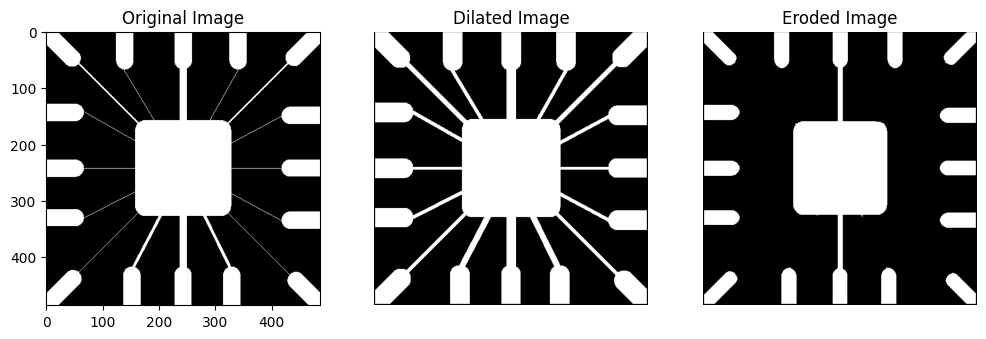

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
kernel = np.ones((5, 5), np.uint8)

height, width = gray_img.shape


def manual_dilation(image, kernel):
    
    dilated = np.zeros_like(image)
    
   
    for i in range(2, height-2):
        for j in range(2, width-2):
           
            region = image[i-2:i+3, j-2:j+3]  
            
           
            if np.any(region & kernel): 
                dilated[i, j] = 255
    return dilated


def manual_erosion(image, kernel):
    eroded = np.zeros_like(image)
    for i in range(2, height-2):
        for j in range(2, width-2):  
            region = image[i-2:i+3, j-2:j+3] 
            if np.all(region & kernel):  
                eroded[i, j] = 255
    return eroded


dilated_image_manual = manual_dilation(gray_img, kernel)
eroded_image_manual = manual_erosion(gray_img, kernel)

dilated_rgba_manual = cv2.cvtColor(dilated_image_manual, cv2.COLOR_GRAY2RGBA)
eroded_rgba_manual = cv2.cvtColor(eroded_image_manual, cv2.COLOR_GRAY2RGBA)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGBA))  

plt.subplot(1, 3, 2)
plt.title("Dilated Image")
plt.imshow(dilated_rgba_manual)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Eroded Image")
plt.imshow(eroded_rgba_manual)
plt.axis('off')

plt.show()


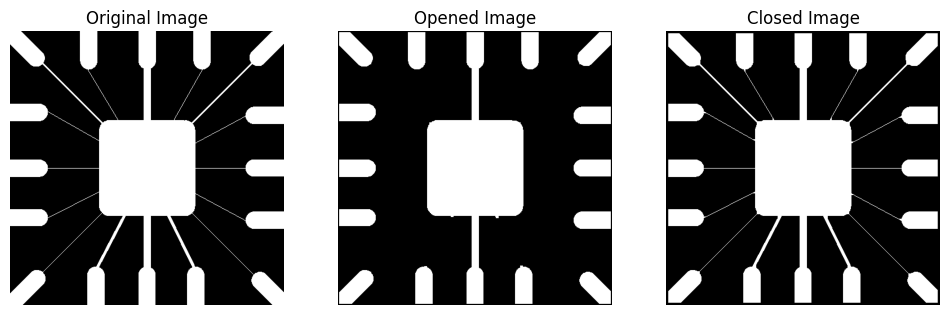

In [29]:
def manual_opening(image, kernel):
    eroded = manual_erosion(image, kernel)
    return manual_dilation(eroded, kernel)

def manual_closing(image, kernel):
    dilated = manual_dilation(image, kernel)
    return manual_erosion(dilated, kernel)


opened_image = manual_opening(gray_img, kernel)
closed_image = manual_closing(gray_img, kernel)

opened_rgba = cv2.cvtColor(opened_image, cv2.COLOR_GRAY2RGBA)
closed_rgba = cv2.cvtColor(closed_image, cv2.COLOR_GRAY2RGBA)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGBA))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Opened Image")
plt.imshow(opened_rgba)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Closed Image")
plt.imshow(closed_rgba)
plt.axis('off')

plt.show()

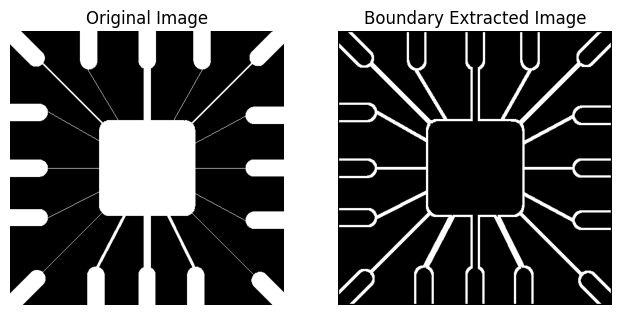

In [30]:
def boundary_extraction(image, kernel):
    dilated = manual_dilation(image, kernel)
    eroded = manual_erosion(image, kernel)
    boundary = dilated - eroded
    return boundary

boundary_image = boundary_extraction(gray_img, kernel)
boundary_rgba = cv2.cvtColor(boundary_image, cv2.COLOR_GRAY2RGBA)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGBA))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Boundary Extracted Image")
plt.imshow(boundary_rgba)
plt.axis('off')

plt.show()